In [153]:
#DS Basics
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt

In [154]:
#SKLearn Stuff

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [155]:
#helpers
%matplotlib inline

In [156]:
from sklearn.tree import DecisionTreeClassifier

In [157]:
data = pd.read_csv('Demographic_Data.csv')
data.head()

in-store  age  items   amount  region
0         0   37      4   281.03       2
1         0   35      2   219.51       2
2         1   45      3  1525.70       4
3         1   46      3   715.25       3
4         1   33      4  1937.50       1

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [159]:
data.head()

in-store  age  items   amount  region
0         0   37      4   281.03       2
1         0   35      2   219.51       2
2         1   45      3  1525.70       4
3         1   46      3   715.25       3
4         1   33      4  1937.50       1

In [160]:
#features
X = data.iloc[:,0:4]
print('Summary of feature sample')
X.head()

Summary of feature sample


in-store  age  items   amount
0         0   37      4   281.03
1         0   35      2   219.51
2         1   45      3  1525.70
3         1   46      3   715.25
4         1   33      4  1937.50

In [161]:
#dependent variable
y = data['region']

In [162]:
data.iloc[:,0:4]

in-store  age  items   amount
0             0   37      4   281.03
1             0   35      2   219.51
2             1   45      3  1525.70
3             1   46      3   715.25
4             1   33      4  1937.50
...         ...  ...    ...      ...
79995         1   71      3   558.82
79996         0   59      7  1932.00
79997         0   54      1   414.16
79998         1   49      4   335.32
79999         1   30      1   527.12

[80000 rows x 4 columns]

In [163]:
#Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [183]:
#Modeling ( Classification )
algo_dtc= DecisionTreeClassifier(max_depth=4)
model_dtc = algo_dtc.fit(X_train, y_train)

In [184]:
#Predictions
preds = model_dtc.predict(X_test)

In [185]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.41      0.55      0.47      4857
           2       0.90      1.00      0.95      5945
           3       0.55      0.24      0.34      5389
           4       0.65      0.71      0.68      7809

    accuracy                           0.64     24000
   macro avg       0.63      0.63      0.61     24000
weighted avg       0.64      0.64      0.63     24000



In [186]:
#Accuracy
print('Accuracuy score is: %.3f'  %accuracy_score(y_test, preds))

Accuracuy score is: 0.645


In [187]:
from sklearn.tree import plot_tree

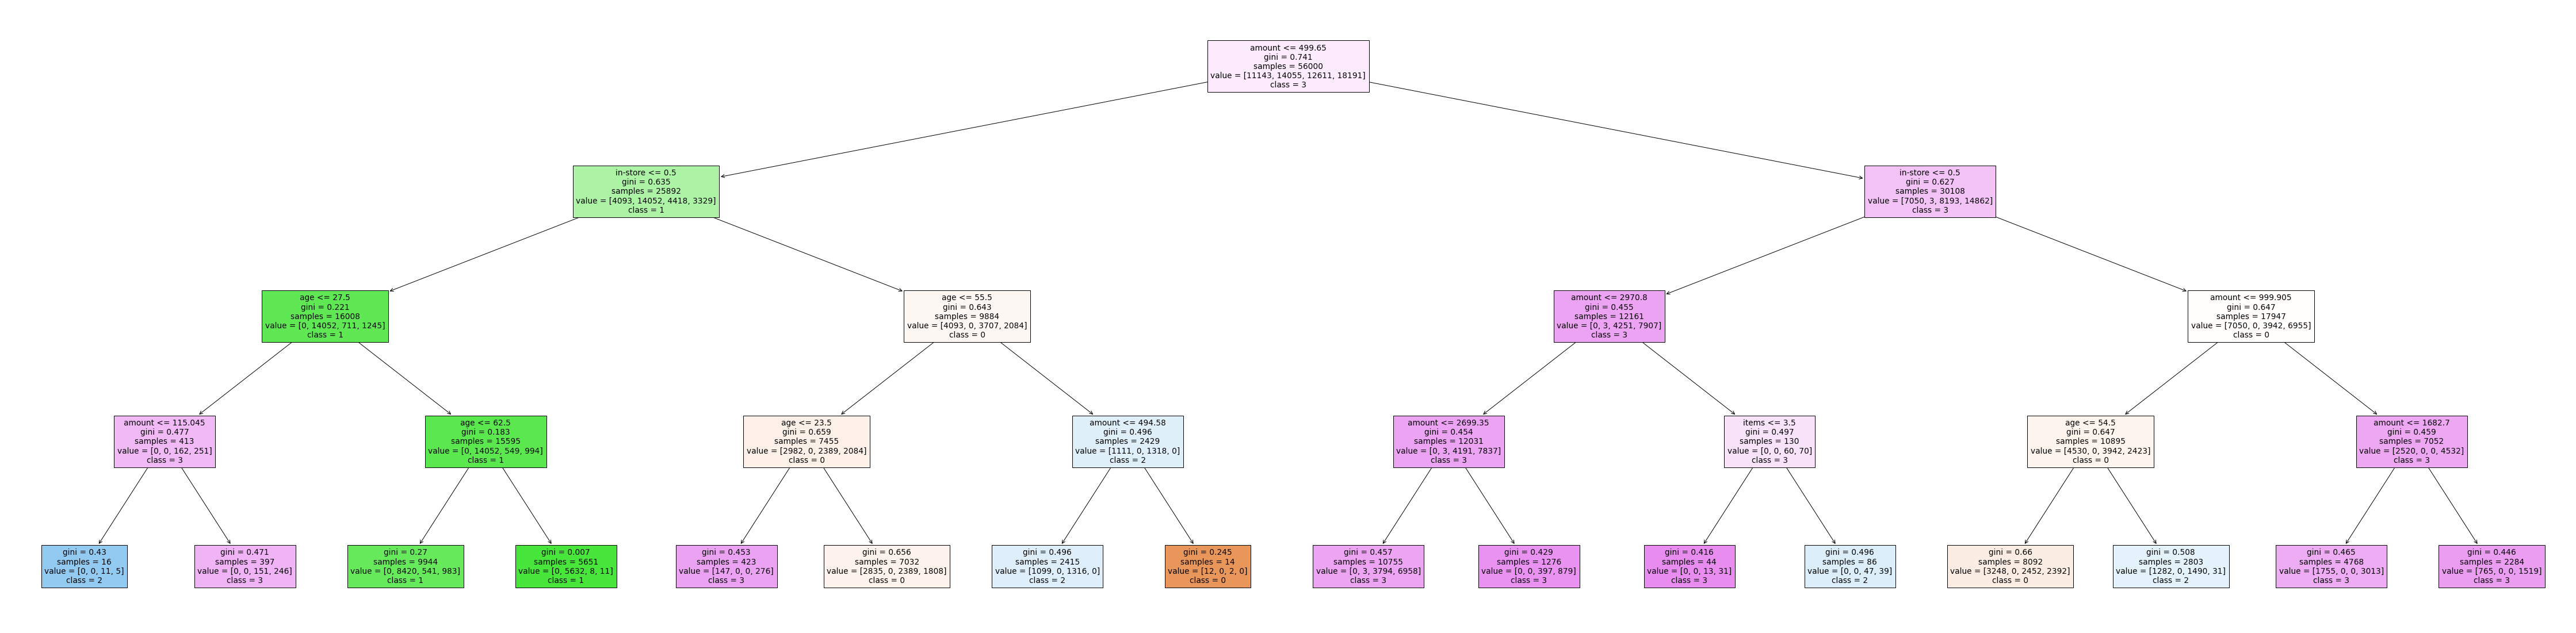

In [189]:
fig = plt.figure(figsize=(80,20))
tree = plot_tree(model_dtc, feature_names=X.columns, class_names=['0', '1', '2', '3'], filled=True)

In [190]:
data.head()

in-store  age  items   amount  region
0         0   37      4   281.03       2
1         0   35      2   219.51       2
2         1   45      3  1525.70       4
3         1   46      3   715.25       3
4         1   33      4  1937.50       1

In [191]:
#discretize Age and use it as depentent variable
#features
X = data.iloc[:, [0,2,3,4]]
print('Summary of feature sample')
X.head()

Summary of feature sample


in-store  items   amount  region
0         0      4   281.03       2
1         0      2   219.51       2
2         1      3  1525.70       4
3         1      3   715.25       3
4         1      4  1937.50       1

In [192]:
#discretize age
#create custom_bucket_array to define age group
custom_bucket_array=[1, 9, 19, 29, 39, 49, 59, 69, 79, 89]
custom_bucket_array

[1, 9, 19, 29, 39, 49, 59, 69, 79, 89]

In [193]:
#use panda's cut function and the array
#data['age_label'] = pd.cut(data['age'], custom_bucket_array, lables=[10, 20, 30, 40, 50, 60])
data['age_label'] = pd.cut(data['age'], custom_bucket_array, labels=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   in-store   80000 non-null  int64  
 1   age        80000 non-null  int64  
 2   items      80000 non-null  int64  
 3   amount     80000 non-null  float64
 4   region     80000 non-null  int64  
 5   age_label  80000 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 3.7 MB


In [194]:
X.head()

in-store  items   amount  region
0         0      4   281.03       2
1         0      2   219.51       2
2         1      3  1525.70       4
3         1      3   715.25       3
4         1      4  1937.50       1

In [195]:
#dependent variable
y=data['age_label']

In [196]:
#Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [197]:
#Modeling ( Classifiction)
algo_dtc = DecisionTreeClassifier(max_depth=3)
model_dtc = algo_dtc.fit(X_train, y_train)

In [198]:

#Predictions
preds = model_dtc.predict(X_test)

In [199]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       288
           2       0.30      0.02      0.04      3817
           3       0.22      0.69      0.33      5278
           4       0.22      0.28      0.24      5392
           5       0.00      0.00      0.00      4385
           6       0.00      0.00      0.00      2689
           7       0.00      0.00      0.00      1560
           8       0.00      0.00      0.00       591

    accuracy                           0.22     24000
   macro avg       0.09      0.12      0.08     24000
weighted avg       0.14      0.22      0.13     24000



/Users/lima/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [200]:
#Accuracy
print('Accuracy score is: %.3f'  %accuracy_score(y_test, preds))

Accuracy score is: 0.220


In [201]:
from sklearn.tree import plot_tree

#### fig = plt.figure(figsize=(60,20))
tree = plot_tree(model_dtc, feature_names=X.columns, class_names=['1', '9', '19', '29', '39', '49', '59', '69', '79', '89'], filled=True)

In [31]:
#discretize amount 

# c_b_a_amount = ([0, 999, 1999, 3001])

#data['amount_label'] = pd.cut(data['amount'], c_b_a_amount, labels=false)

In [203]:
#features
X = data.iloc[:, [0,1,2,4]]

In [204]:
#create an array to define amount
c_b_a_amount = [0, 999, 1999, 3001]
c_b_a_amount

[0, 999, 1999, 3001]

In [205]:
data['amount_label'] = pd.cut(data['amount'], c_b_a_amount, labels = False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   in-store      80000 non-null  int64  
 1   age           80000 non-null  int64  
 2   items         80000 non-null  int64  
 3   amount        80000 non-null  float64
 4   region        80000 non-null  int64  
 5   age_label     80000 non-null  int64  
 6   amount_label  80000 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 4.3 MB


In [206]:
X.head()

in-store  age  items  region
0         0   37      4       2
1         0   35      2       2
2         1   45      3       4
3         1   46      3       3
4         1   33      4       1

In [207]:
# y variable
y = data['amount_label']

In [208]:
#Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [209]:
#Modeling ( Classifiction)
algo_dtc= DecisionTreeClassifier()
model_dtc = algo_dtc.fit(X_train, y_train)

In [210]:
#Predictions
preds = model_dtc.predict(X_test)

In [211]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84     16729
           1       0.42      0.37      0.39      5233
           2       0.32      0.25      0.28      2038

    accuracy                           0.70     24000
   macro avg       0.52      0.49      0.50     24000
weighted avg       0.68      0.70      0.69     24000



In [212]:
#Accuracy
print('Accuracy score is: %.3f'  %accuracy_score(y_test, preds))

Accuracy score is: 0.705


In [213]:
#using RandomForestClassifier
algo_rfc=RandomForestClassifier()
model_rfc=algo_rfc.fit(X_train, y_train)

In [214]:
preds=model_rfc.predict(X_test)

In [215]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84     16729
           1       0.43      0.38      0.40      5233
           2       0.32      0.29      0.30      2038

    accuracy                           0.71     24000
   macro avg       0.52      0.51      0.52     24000
weighted avg       0.69      0.71      0.70     24000



In [216]:
print('Accuracy score is: %.3f'  %accuracy_score(y_test, preds))

Accuracy score is: 0.706


In [217]:
# using GradientBoostingClassifier
algo_gbc=RandomForestClassifier()
model_gbc=algo_gbc.fit(X_train, y_train)

In [218]:
preds=model_gbc.predict(X_test)

In [219]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84     16729
           1       0.43      0.38      0.40      5233
           2       0.33      0.30      0.31      2038

    accuracy                           0.71     24000
   macro avg       0.53      0.51      0.52     24000
weighted avg       0.69      0.71      0.70     24000



In [220]:
print('Accuracy score is: %.3f'  %accuracy_score(y_test, preds))

Accuracy score is: 0.706


In [50]:
# discretize 'online/in-store' using DecisionTreeClassification

In [221]:
data.head()

in-store  age  items   amount  region  age_label  amount_label
0         0   37      4   281.03       2          3             0
1         0   35      2   219.51       2          3             0
2         1   45      3  1525.70       4          4             1
3         1   46      3   715.25       3          4             0
4         1   33      4  1937.50       1          3             1

In [222]:
# X variable 
X = data.iloc[:, 1:5]
X.head()

age  items   amount  region
0   37      4   281.03       2
1   35      2   219.51       2
2   45      3  1525.70       4
3   46      3   715.25       3
4   33      4  1937.50       1

In [223]:
#y variable
y = data['in-store']

In [224]:
#train/test split
X_train, X_text, y_train, y_test=train_test_split(X, y, test_size=.30, random_state=123)

In [246]:
#modelling
algo_dtc = DecisionTreeClassifier(max_depth=6)
model_dtc = algo_dtc.fit(X_train, y_train)

In [247]:
#predictions
preds = model_dtc.predict(X_test)

In [248]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.70      0.67      0.69     11831
           1       0.70      0.72      0.71     12169

    accuracy                           0.70     24000
   macro avg       0.70      0.70      0.70     24000
weighted avg       0.70      0.70      0.70     24000



In [249]:
#Accuracy
print('Accuracy score is: %.3f'  %accuracy_score(y_test, preds))

Accuracy score is: 0.700


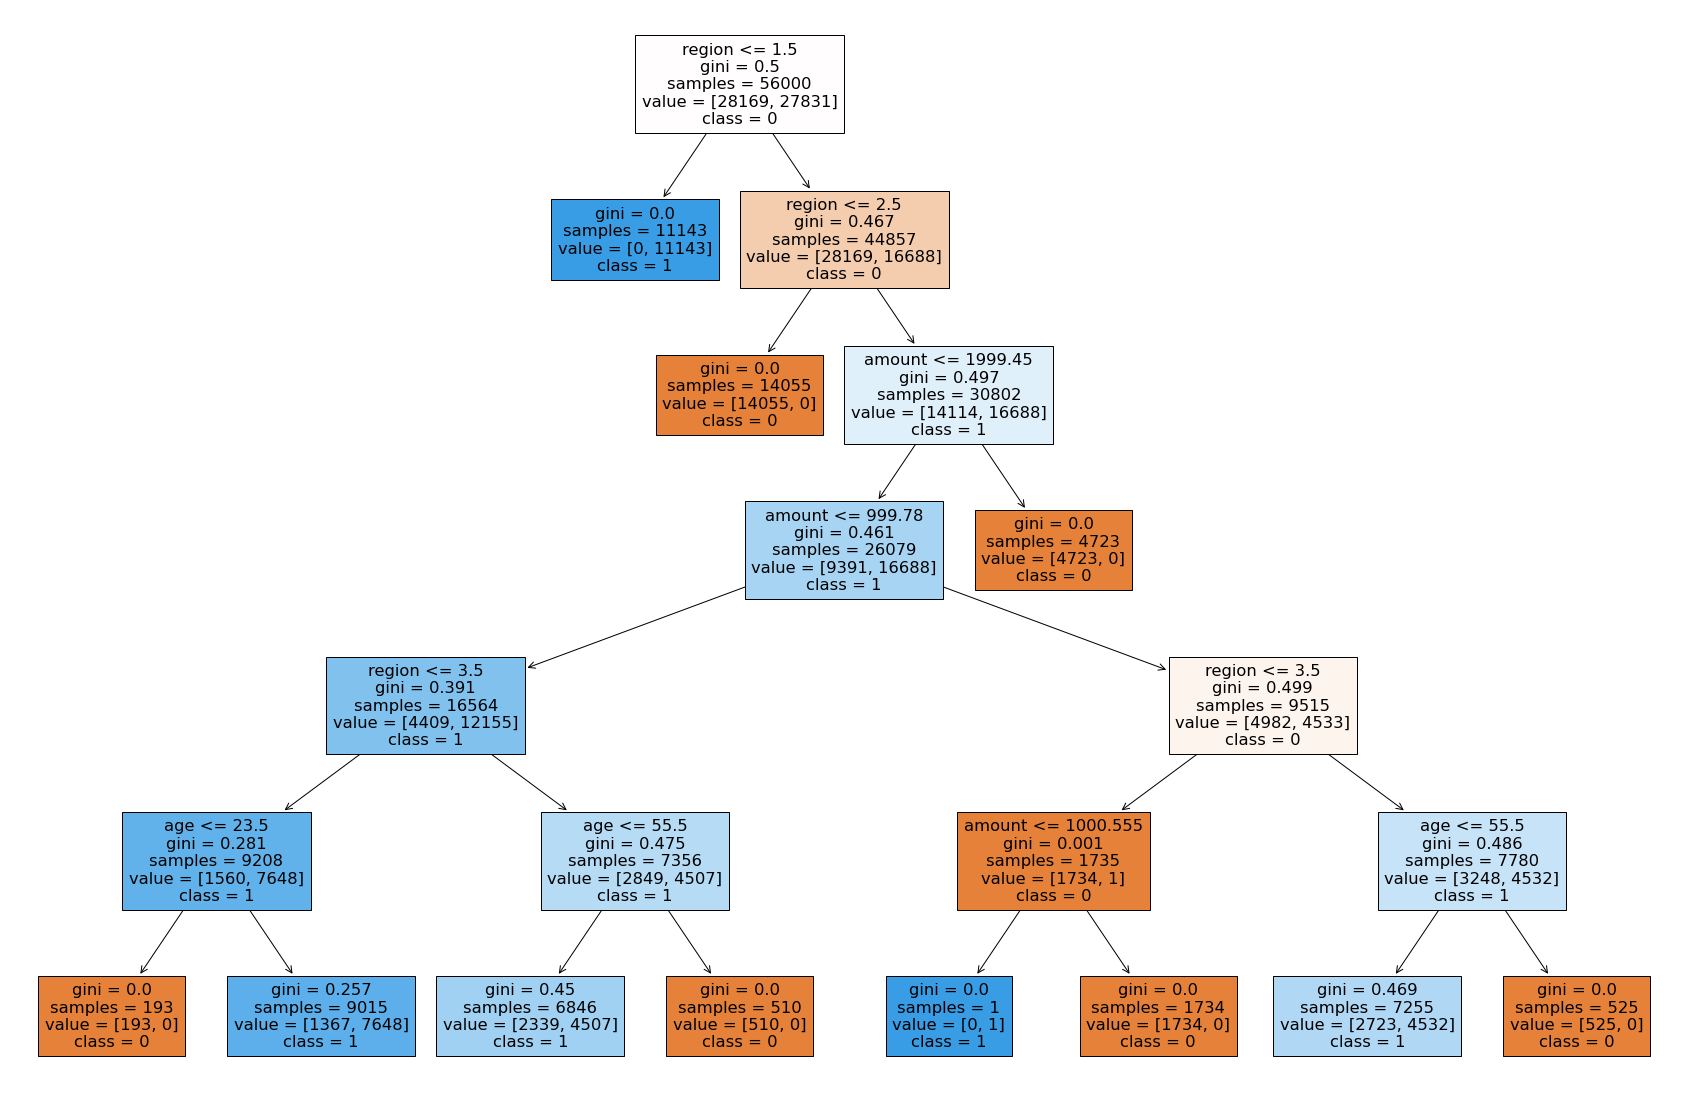

In [251]:
#plot the tree
fig = plt.figure(figsize=(30,20))
tree = plot_tree(model_dtc, feature_names=X.columns, class_names=['0','1'], filled=True)

In [60]:
## discretize 'online/in-store' using RandomForestClassification

In [61]:
X = data.iloc[:,1:5]
X.head()

age  items   amount  region
0   37      4   281.03       2
1   35      2   219.51       2
2   45      3  1525.70       4
3   46      3   715.25       3
4   33      4  1937.50       1

In [62]:
y = data['in-store']

In [63]:
X_train, X_text, y_train, y_test=train_test_split(X, y, test_size=.30, random_state=123)

In [64]:
algo_rfc = RandomForestClassifier(n_estimators=100)
model_rfc = algo_rfc.fit(X_train, y_train)

In [65]:
preds = model_rfc.predict(X_test)

In [66]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.70      0.67      0.69     11831
           1       0.70      0.72      0.71     12169

    accuracy                           0.70     24000
   macro avg       0.70      0.70      0.70     24000
weighted avg       0.70      0.70      0.70     24000



In [67]:
#Accuracy
print('Accuracy score is: %.3f'  %accuracy_score(y_test, preds))

Accuracy score is: 0.700


In [68]:
# discretize 'online/in-store' using GradientBoostingClassification

In [252]:
X = data.iloc[:, 1:5]

In [253]:
y = data['in-store']

In [254]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30)

In [255]:
algo_gbc = GradientBoostingClassifier()
model_gbc = algo_gbc.fit(X_train, y_train)

In [256]:
preds = model_gbc.predict(X_test)

In [257]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87     11895
           1       0.82      1.00      0.90     12105

    accuracy                           0.89     24000
   macro avg       0.91      0.89      0.88     24000
weighted avg       0.91      0.89      0.88     24000



In [258]:
print('Accuracy score is: %.3f'  %accuracy_score(y_test, preds))

Accuracy score is: 0.886


In [76]:
# Discretize 'region' use RandomForestClassifer & GradientBooostingClassifier

In [77]:
# discretize region
#import train_test_split function
from sklearn.model_selection import train_test_split

In [78]:
#features
X = data.iloc[:,0:4]
print('Summary of feature sample')
X.head()

Summary of feature sample


in-store  age  items   amount
0         0   37      4   281.03
1         0   35      2   219.51
2         1   45      3  1525.70
3         1   46      3   715.25
4         1   33      4  1937.50

In [79]:
#dependent variable
y = data['region']

In [80]:
#split dataset into training set and test set
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3)

In [81]:
#use RandomForestClassifier
algo_rfc = RandomForestClassifier()
model_rfc = algo_rfc.fit(X_train, y_train)

In [82]:
preds = model_rfc.predict(X_test)

In [83]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.39      0.39      0.39      4751
           2       0.90      0.96      0.93      6020
           3       0.39      0.35      0.37      5387
           4       0.57      0.58      0.57      7842

    accuracy                           0.59     24000
   macro avg       0.56      0.57      0.57     24000
weighted avg       0.58      0.59      0.58     24000



In [84]:
print('Accuracy score is: %.3f'  %accuracy_score(y_test, preds))

Accuracy score is: 0.586


In [85]:
# discretize region use GradientBoostingClassifier
#use GradientBoostingClassifier
X = data.iloc[:,0:4]

In [86]:
y = data['region']

In [87]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30, random_state=123)

In [88]:
algo_gbc = GradientBoostingClassifier()
model_gbc = algo_gbc.fit(X_train, y_train)

In [89]:
preds = model_gbc.predict(X_test)

In [90]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.41      0.53      0.46      4857
           2       0.90      1.00      0.95      5945
           3       0.53      0.23      0.32      5389
           4       0.65      0.73      0.69      7809

    accuracy                           0.65     24000
   macro avg       0.62      0.62      0.61     24000
weighted avg       0.64      0.65      0.62     24000



In [91]:
print('Accuracy score is: %.3f'  %accuracy_score(y_test, preds))

Accuracy score is: 0.645


In [92]:
#discretize age use RandomForestClassifier & GradientBoostingClassifier

In [93]:
#use RandomForestClassifier
X = data.iloc[:, [0,2,3,4]]
X.head()

in-store  items   amount  region
0         0      4   281.03       2
1         0      2   219.51       2
2         1      3  1525.70       4
3         1      3   715.25       3
4         1      4  1937.50       1

In [94]:
custom_bucket_array = ([1,9,19,29,39,49,59,69,79,89])
custom_bucket_array

[1, 9, 19, 29, 39, 49, 59, 69, 79, 89]

In [95]:
data['age_label'] = pd.cut(data['age'], custom_bucket_array, labels=False)
y = data['age_label']

In [96]:
#split data into traing / test set
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.30, random_state=123)

In [97]:
# discretize age using RandomForestClassifier
algo_rfc = RandomForestClassifier()
model_rfc = algo_rfc.fit(X_train, y_train)

In [98]:
preds = model_rfc.predict(X_test)

In [99]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.02      0.02      0.02       288
           2       0.21      0.21      0.21      3817
           3       0.24      0.24      0.24      5278
           4       0.23      0.22      0.23      5392
           5       0.20      0.21      0.20      4385
           6       0.15      0.16      0.16      2689
           7       0.13      0.12      0.13      1560
           8       0.12      0.13      0.12       591

    accuracy                           0.20     24000
   macro avg       0.16      0.16      0.16     24000
weighted avg       0.20      0.20      0.20     24000



In [100]:
print('Accuracy score is: %.3f'  %accuracy_score(y_test, preds))

Accuracy score is: 0.203


In [101]:
# discretize age using RandomForestClassifier
algo_gbc = GradientBoostingClassifier()
model_gbc = algo_gbc.fit(X_train, y_train)

In [102]:
preds = model_gbc.predict(X_test)

In [103]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.02      0.00      0.01       288
           2       0.25      0.24      0.24      3817
           3       0.23      0.31      0.26      5278
           4       0.23      0.31      0.26      5392
           5       0.20      0.15      0.17      4385
           6       0.16      0.12      0.14      2689
           7       0.18      0.07      0.11      1560
           8       0.15      0.01      0.02       591

    accuracy                           0.22     24000
   macro avg       0.18      0.15      0.15     24000
weighted avg       0.21      0.22      0.21     24000



In [104]:
print('Accuracy score is: %.3f'  %accuracy_score(y_test, preds))

Accuracy score is: 0.221


In [105]:
#cross validation method
from sklearn.model_selection import cross_val_score

In [106]:
model_dtc = DecisionTreeClassifier()

In [107]:
print(cross_val_score(model_dtc, X, y, cv=3)) #cv=number of folds being held out

[0.20043499 0.20092249 0.19841746]


In [108]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))

In [109]:
#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X,y,cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [110]:
for i in range(len(names)):
    print(names[i], results[i].mean())

Random Forest Classifier 0.1991874880308465
Decision Tree Classifier 0.20006246865587773
Gradient Boosting Classifier 0.22132502022566689
